## Projeto 3 da disciplina de Modelagem e Simulação do Mundo Físico
#### Alunos:
__Cicero Tiago Carneiro Valentim__  
__Kathleen da Silva Nascimento__  
__Giovanna Alves Papandrea Neves__  
__Thalia Loiola Silva__  

In [71]:
# Importando as bibliotecas necessárias:
from math import sqrt, pi, cos, sin
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import pylab as p
import mpl_toolkits.mplot3d.axes3d as p3

In [72]:
# Definindo os parâmetros relevantes:
r = 0.0213              # raio da bola (m)
A = pi*(r**2)           # Área transversal (m²)
V = 4*pi*(r**3)/3       # Volume da esfera (m³)
ro = 1.29               # densidade volumétrica (kg/m³)
w = 134                 # velocidade angular aproximada (rad/s)
g = 9.8                 # Aceleração gravitacional
m = 0.04                # massa da esfera (kg)

Agora vamos definir as funções que fornecem as equações diferenciais.

A função "eq_dif" fornece as equações diferenciais para o movimento levando em conta Efeito Magnus e Efeito de Arrasto.
A função "eq_dif2" fornece as equações diferenciais para o movimento levando em conta somente o Efeito de Arrasto.

In [73]:
# Equações diferenciais:

def eq_dif(lista_equacoes, tempo):
    x = lista_equacoes[0]
    y = lista_equacoes[1]
    z = lista_equacoes[2]
    
    vx = lista_equacoes[3]
    vy = lista_equacoes[4]
    vz = lista_equacoes[5]

    v = sqrt((vx**2) + (vy**2) + (vz**2)) # módulo da velocidade
    
    if y < 0: # caso a bola atinja novamente o plano horizontal, o movimento cessa:
        dxdt = 0
        dydt = 0
        dzdt = 0
        dvxdt = 0
        dvydt = 0
        dvzdt = 0
        resultante = 0
    else: # caso contrário, ele continua:
        dxdt = vx
        dydt = vy
        dzdt = vz
       
        if v > 0 :
            Cl = 0.12   # coeficiente de sustentação (Magnus)
            Cd = 0.25   # coeficiente de arrasto
            
            D = -ro*(v**2)*A*Cd/2 # força de arrasto
            Dx = D*vx/v # componente em x da força de arrasto
            Dy = D*vy/v # componente em y da força de arrasto
            Dz = D*vz/v # componente em z da força de arrasto
            
            mod = sqrt(2*( (vz-vy)**2 + vx**2 + vx**2)) # módulo de (w x v) (produto vetorial)
            M = -ro*(v**2)*A*Cl/2 # força Magnus
            Mx = M*(vz-vy)/mod # componente em x da força Magnus
            My = M*vx/mod # componente em y da força Magnus
            Mz = -M*vx/mod # componente em z da força Magnus
            
            Rx = Dx + Mx # Resultante das forças em x
            Ry = Dy + My - m*g # Resultante das forças em y
            Rz = Dz + Mz # Resultante das forças em z
            
            dvxdt = Rx/m
            dvydt = Ry/m
            dvzdt = Rz/m
            
        elif v == 0:
            D = 0
            M = 0
            Ry = -m*g
            
            dvxdt = 0
            dvydt = Ry/m
            dvzdt = 0
    
        
    return dxdt, dydt, dzdt, dvxdt, dvydt, dvzdt

# Analogamente, mas com coeficiente de sustentação (Magnus) = 0:
def eq_dif2(lista_equacoes, tempo):
    x = lista_equacoes[0]
    y = lista_equacoes[1]
    z = lista_equacoes[2]
    
    vx = lista_equacoes[3]
    vy = lista_equacoes[4]
    vz = lista_equacoes[5]

    v = sqrt((vx**2) + (vy**2) + (vz**2)) # módulo da velocidade
    
    if y < 0:
        dxdt = 0
        dydt = 0
        dzdt = 0
        dvxdt = 0
        dvydt = 0
        dvzdt = 0
       
    else:        
        dxdt = vx
        dydt = vy
        dzdt = vz
       
        if v > 0 :
            Cl = 0 # o coeficiente de sustentação (Magnus)
            Cd = 0.25 
            
            D = -ro*(v**2)*A*Cd/2
            Dx = D*vx/v
            Dy = D*vy/v
            Dz = 0
            
            mod = sqrt(2*((vz-vy)**2 + vx**2 + vx**2)) # modulo de (w x v)
            M = -ro*(v**2)*A*Cl/2
            Mx = M*(vz-vy)/mod
            My = M*vx/mod
            Mz = 0
            
            Rx = Dx + Mx
            Ry = Dy + My - m*g
            Rz = Dz + Mz
            
            dvxdt = Rx/m
            dvydt = Ry/m
            dvzdt = 0
        elif v == 0:
            D = 0
            M = 0
            Ry = -m*g
            dvxdt = 0
            dvydt = Ry/m
            dvzdt = 0 
    return dxdt, dydt, dzdt, dvxdt, dvydt, dvzdt

A seguir, definimos as condições iniciais, para que assim seja possível usar o método do odeint, e então plotar gráficos.

Nesses gráficos é possível analisar e comparar a trajetória que a bola de golfe faz para o movimento que considera tanto o Efeito Magnus, quanto o Efeito de Arrasto, e a trajetória que é feita quando se considera apenas o Efeito de Arrasto.

In [74]:
# Lista de tempo analisado
dt = 1e-4
lista_tempo = np.arange(0, 15, dt)

# Condições iniciais para módulo da velocidade e ângulo de lançamento, respectivamente
v = 76              # velocidade de lançamento (m/s)
theta = 17          # angulo de lançamento (graus)

# Condições iniciais x, y, z, vx, vy e vz respectivamente:
condicoes_iniciais = [0, 0, 0, v*cos(theta*pi/180), v*sin(theta*pi/180),0]

In [75]:
# Aplicando o odeint:
solucao = odeint(eq_dif, condicoes_iniciais, lista_tempo)   # com efeito Magnus e arrasto
solucao2 = odeint(eq_dif2, condicoes_iniciais, lista_tempo) # somente com arrasto

# Com efeito Magnus e Arrasto
x = solucao[:,0]
y = solucao[:,1]
z = solucao[:,2]
vx = solucao[:,3]
vy = solucao[:,4]
vz = solucao[:,5]

# Somente com Arrasto (não há forças na direção do eixo z)
x1 = solucao2[:,0]
y1 = solucao2[:,1]
vx1 = solucao2[:,3]
vy1 = solucao2[:,4]

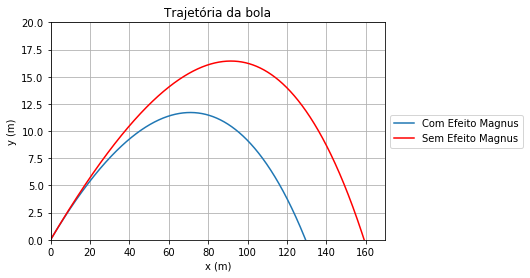

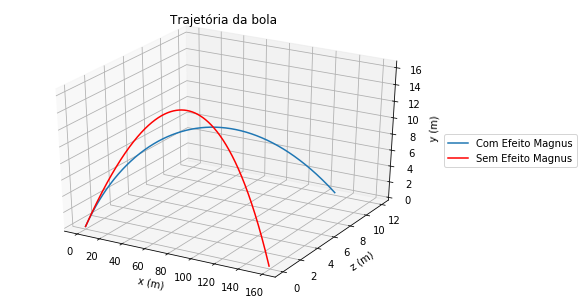

In [76]:
# Plotando os gráficos:

# Gráfico 2D
plt.plot(x, y, label = 'Com Efeito Magnus') 
plt.plot(x1, y1, 'r', label = 'Sem Efeito Magnus')
plt.title("Trajetória da bola")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.axis([0,170, 0, 20])
plt.show()

# Gráfico 3D
fig=p.figure()
ax = p3.Axes3D(fig)
ax.plot(solucao[:,0], solucao[:,2], solucao[:,1], label = "Com Efeito Magnus")
ax.plot(solucao2[:,0], solucao2[:,2], solucao2[:,1],'r', label = "Sem Efeito Magnus")
ax.set_xlabel("x (m)")
ax.set_ylabel("z (m)")
ax.set_zlabel("y (m)")
ax.set_title("Trajetória da bola")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

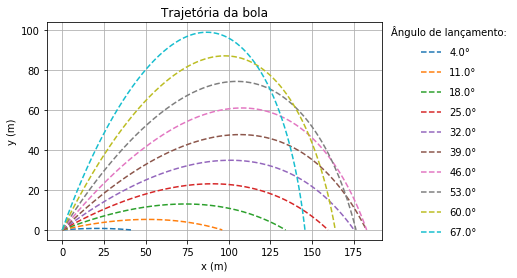

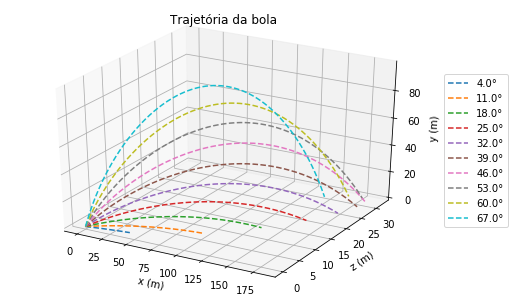

In [77]:
# Agora serão gerados trajetórias projetadas no plano xy e em 3D para vários ângulos de lançamento

# Gráfico em 2D (projetado no plano xy)
lista_de_angulos = []
lista_de_alcances = []

for i in range(10):
    theta = 4 + 7*i 
    condicoes_iniciais = [0, 0,0, v*cos(theta*pi/180), v*sin(theta*pi/180),0] # para theta variável
    solucao = odeint(eq_dif, condicoes_iniciais, lista_tempo)   # com efeito Magnus e Arrasto
    x = solucao[:,0]
    y = solucao[:,1]
    alcance = sqrt((x[-1]**2)+(z[-1]**2))
    lista_de_alcances.append(alcance) # será utilizado no gráfico conclusivo 
    lista_de_angulos.append(theta) # será utilizado no gráfico conclusivo
    
    plt.plot(x, y,'--', label = '{:.1f}°'.format(theta))
    
plt.title("Trajetória da bola")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), scatterpoints=1, frameon=False, labelspacing=1, title='Ângulo de lançamento:')
plt.show()


# Gráfico 3D
fig=p.figure()
ax = p3.Axes3D(fig)
for i in range(10):
    theta = 4 + 7*i 
    condicoes_iniciais = [0, 0,0, v*cos(theta*pi/180), v*sin(theta*pi/180),0] # para theta variável
    solucao = odeint(eq_dif, condicoes_iniciais, lista_tempo)   # com efeito Magnus e Arrasto
    x = solucao[:,0]
    y = solucao[:,1]
    z = solucao[:,2]
    ax.plot(x,z,y,'--', label = '{:.1f}°'.format(theta))
ax.set_xlabel("x (m)")
ax.set_ylabel("z (m)")
ax.set_zlabel("y (m)")
ax.set_title("Trajetória da bola")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


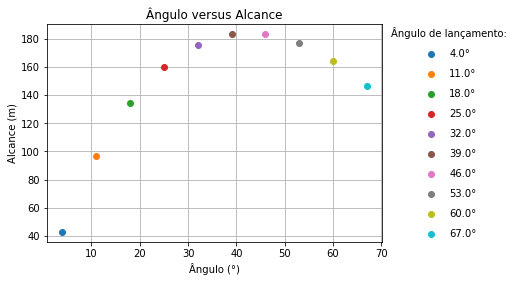

In [78]:
# Gráfico conclusivo
for i in range(len(lista_de_angulos)):
    plt.plot(lista_de_angulos[i],lista_de_alcances[i],'o', label = "{:.1f}°".format(lista_de_angulos[i]))
plt.title("Ângulo versus Alcance")
plt.xlabel("Ângulo (°)")
plt.ylabel("Alcance (m)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), scatterpoints=0, frameon=False, labelspacing=1, title='Ângulo de lançamento:')
plt.grid(True)
plt.show()

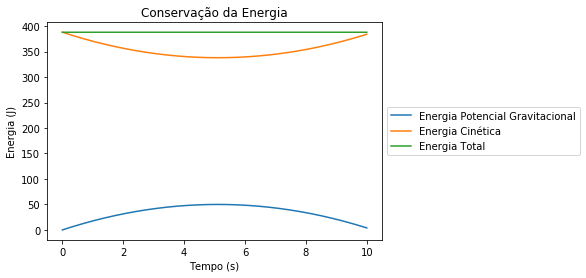

In [82]:
# Para analisar a conservação da energia, serão desprezados os efeitos dissipativos com o ar.
# Consequentemente, o movimento ocorrerá apenas no plano xy
# Nesse caso, temo a seguinte função de equações diferenciais:
def eq_dif(lista_equacoes, tempo):
    x = lista_equacoes[0]
    y = lista_equacoes[1]
    vx = lista_equacoes[2]
    vy = lista_equacoes[3]
    v = sqrt((vx**2) + (vy**2))
    
    if y < 0:
        dxdt = 0
        dydt = 0
        dvxdt = 0
        dvydt = 0
    else:
        dxdt = vx
        dydt = vy
        if v > 0 :
            Cl = 0
            Cd = 0 
            cos_alfa = vx/v
            sen_alfa = vy/v
            
            Fd = ro*(v**2)*A*Cd/2
            Fm = ro*(v**2)*A*Cl/2
            
            Rx = -Fd*cos_alfa - Fm*sen_alfa
            dvxdt = Rx/m
            
            Ry = -Fd*sen_alfa + Fm*cos_alfa - m*g
            dvydt = Ry/m

        elif v == 0:
            Fd = 0
            Fm = 0
            Ry = -m*g
            dvxdt = 0
            dvydt = Ry/m

        
    return dxdt, dydt, dvxdt, dvydt

#lista de tempo analisado
dt = 1e-4
lista_tempo = np.arange(0, 10, dt)

# Condicoes iniciais: x, y, vx, vy respectivamente
condicoes_iniciais = [0, 0, 130, 50]

solucao = odeint(eq_dif, condicoes_iniciais, lista_tempo)

# Solucoes 
x = solucao[:,0]
y = solucao[:,1]
vx = solucao[:,2]
vy = solucao[:,3]

energia_pot = []
energia_c = []
energia_total = []
for i in range(0, len(lista_tempo)):
    x1 = solucao[:,0][i]
    y1 = solucao[:,1][i]
    vx1 = solucao[:,2][i]
    vy1 = solucao[:,3][i]
    
    v = sqrt(vx1**2 + vy1**2)
    
    pot_grav = m*g*y1
    en_cinet = m*(v**2)/2
    
    energia_c.append(en_cinet)
    energia_pot.append(pot_grav)
    
    energia_total.append(pot_grav + en_cinet)

plt.plot(lista_tempo, energia_pot, label ='Energia Potencial Gravitacional')
plt.plot(lista_tempo, energia_c, label = 'Energia Cinética')
plt.plot(lista_tempo, energia_total, label = 'Energia Total')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title("Conservação da Energia")

plt.xlabel('Tempo (s)')
plt.ylabel('Energia (J)')

plt.show()